# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Naufal Athallah Iwel
- **Email:** naufalaiwel@gmail.com
- **ID Dicoding:** naufalathllah

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda di berbagai waktu dalam sehari?
- Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan di jam-jam tertentu, dan bagaimana hal ini berkaitan dengan musim?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [17]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

**Insight:**
- day.csv berisi data penggunaan sepeda secara harian
- hour.csv memiliki data per jam

### Assessing Data

In [18]:
print(df_day.info())
print(df_hour.info())
print(df_day.head())
print(df_hour.head())
print("Jumlah duplikasi pada df_day:", df_day.duplicated().sum())
print("Jumlah duplikasi pada df_hour:", df_hour.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Dataset *day.csv* memiliki 731 entri dengan 16 kolom, sementara *hour.csv* memiliki 17.379 entri dengan 17 kolom.
- Kolom **dteday** bertipe object, sebaiknya diubah ke datetime untuk mempermudah analisis waktu.
- Tidak ada nilai kosong dalam kedua dataset, jadi tidak perlu penanganan missing value.
- Kolom **cnt** menunjukkan jumlah total pengguna sepeda; **casual** dan **registered** mengindikasikan jumlah pengguna tanpa dan dengan registrasi.
- Kolom **weathersit** dapat digunakan untuk melihat pengaruh kondisi cuaca terhadap jumlah pengguna sepeda.
- Kolom **weekday** dan **workingday** dapat digunakan untuk menganalisis pola mingguan dan antara hari kerja vs akhir pekan.
- Tidak ditemukan data duplikat pada kedua dataset, sehingga tidak ada baris yang perlu dihapus.

### Cleaning Data

In [19]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- Kolom `dteday` pada *df_day* dan *df_hour* telah dikonversi menjadi tipe data datetime untuk memudahkan analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

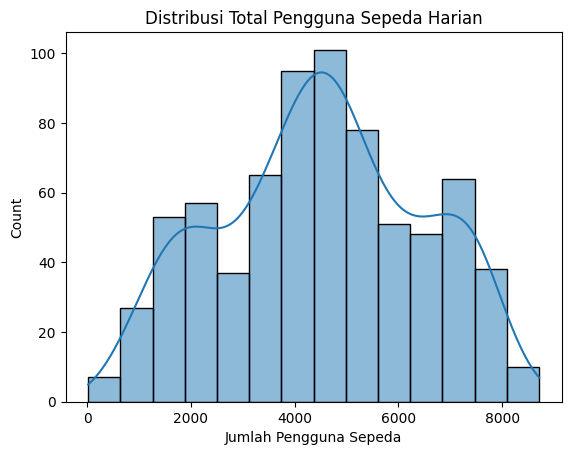

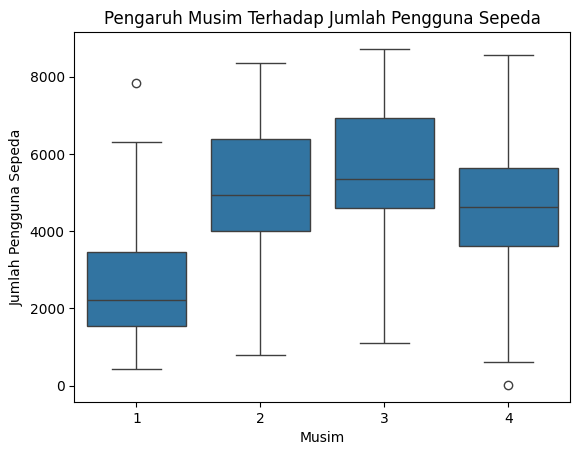

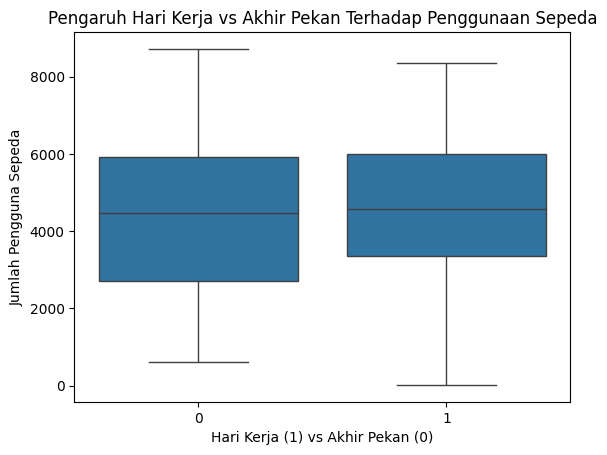

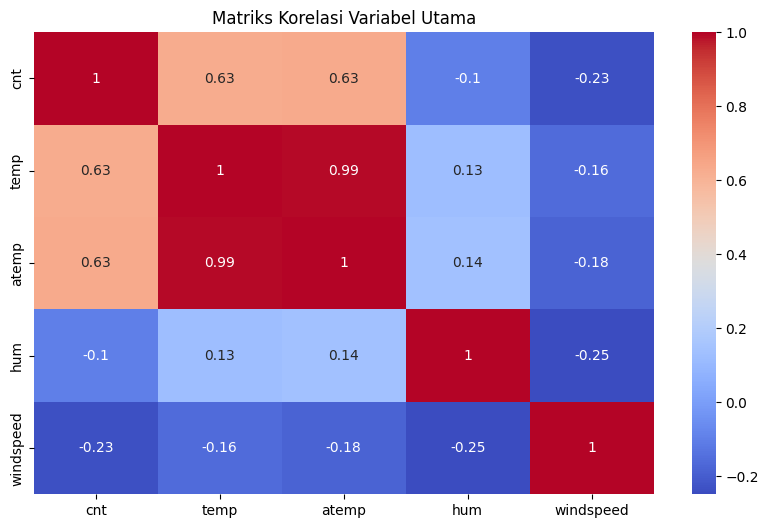

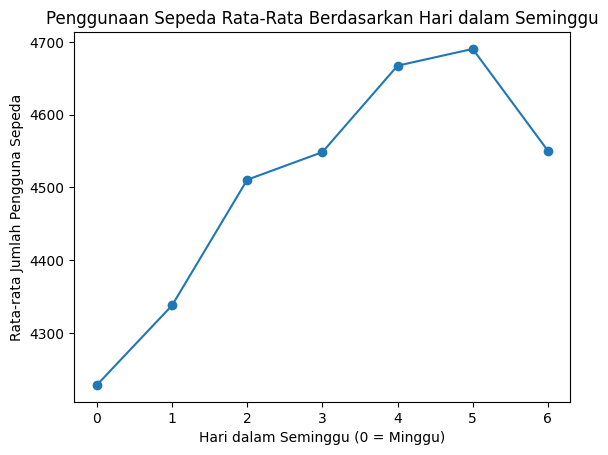

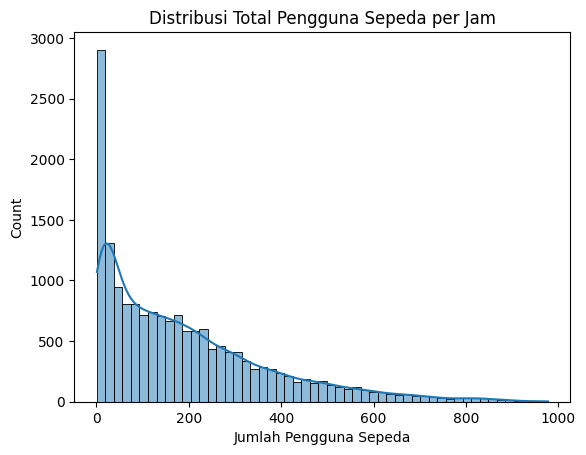

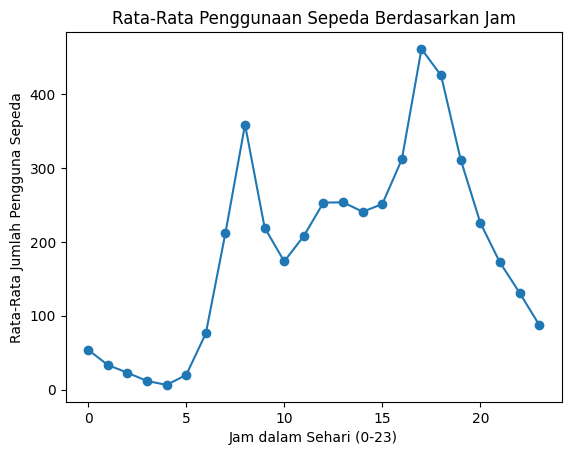

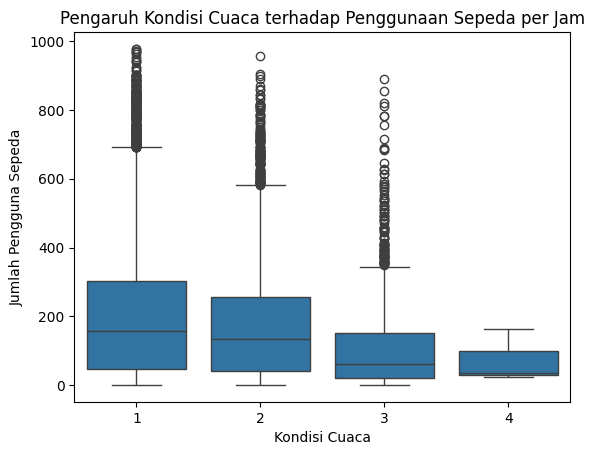

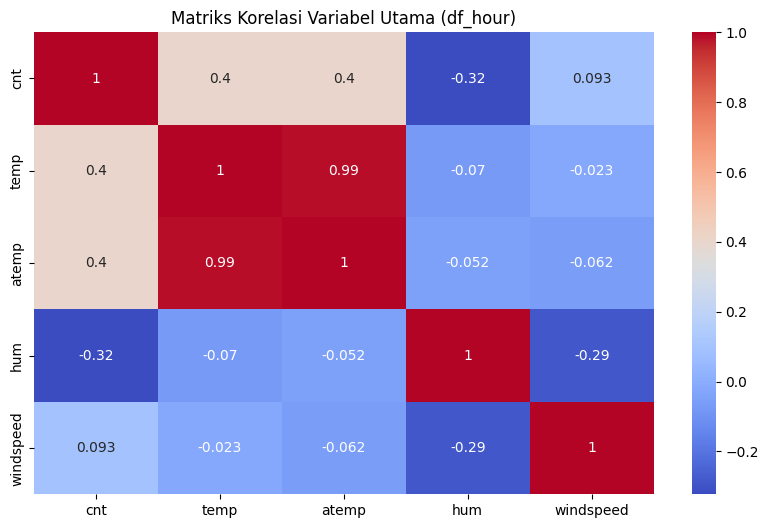

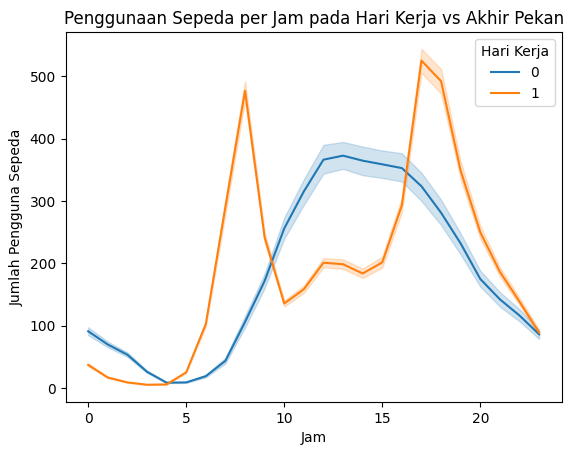

In [20]:
print(df_day.describe())
print(df_hour.describe())

sns.histplot(df_day['cnt'], kde=True)
plt.title("Distribusi Total Pengguna Sepeda Harian")
plt.xlabel("Jumlah Pengguna Sepeda")
plt.show()

sns.boxplot(x='season', y='cnt', data=df_day)
plt.title("Pengaruh Musim Terhadap Jumlah Pengguna Sepeda")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title("Pengaruh Hari Kerja vs Akhir Pekan Terhadap Penggunaan Sepeda")
plt.xlabel("Hari Kerja (1) vs Akhir Pekan (0)")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_day[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Variabel Utama")
plt.show()

avg_cnt_per_weekday = df_day.groupby('weekday')['cnt'].mean()
avg_cnt_per_weekday.plot(kind='line', marker='o')
plt.title("Penggunaan Sepeda Rata-Rata Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu)")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.show()

sns.histplot(df_hour['cnt'], kde=True)
plt.title("Distribusi Total Pengguna Sepeda per Jam")
plt.xlabel("Jumlah Pengguna Sepeda")
plt.show()

avg_cnt_per_hour = df_hour.groupby('hr')['cnt'].mean()
avg_cnt_per_hour.plot(kind='line', marker='o')
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari (0-23)")
plt.ylabel("Rata-Rata Jumlah Pengguna Sepeda")
plt.show()

sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title("Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda per Jam")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_hour[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Variabel Utama (df_hour)")
plt.show()

sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour)
plt.title("Penggunaan Sepeda per Jam pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.legend(title="Hari Kerja")
plt.show()

**Insight:**
- Distribusi pengguna sepeda harian menunjukkan pola yang mengindikasikan jumlah pengguna terbanyak dalam sehari.
- Terdapat perbedaan penggunaan sepeda di tiap musim; musim tertentu menunjukkan jumlah pengguna lebih tinggi.
- Penggunaan sepeda cenderung berbeda antara hari kerja dan akhir pekan, mungkin karena perbedaan kebutuhan pengguna.
- Matriks korelasi menunjukkan hubungan positif antara suhu dan jumlah pengguna sepeda.
- Penggunaan sepeda lebih tinggi di hari-hari tertentu, seperti akhir pekan.
- Distribusi pengguna sepeda per jam menunjukkan waktu-waktu dengan penggunaan sepeda tertinggi.
- Penggunaan sepeda mencapai puncak pada jam tertentu, seperti jam kerja atau sore hari.
- Kondisi cuaca memengaruhi jumlah pengguna per jam, terutama saat cuaca buruk.
- Korelasi pada df_hour menunjukkan hubungan positif antara suhu (`temp`) dan jumlah pengguna sepeda (`cnt`).
- Penggunaan sepeda pada hari kerja berbeda dengan akhir pekan, terlihat pada jam-jam puncak.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda di berbagai waktu dalam sehari?

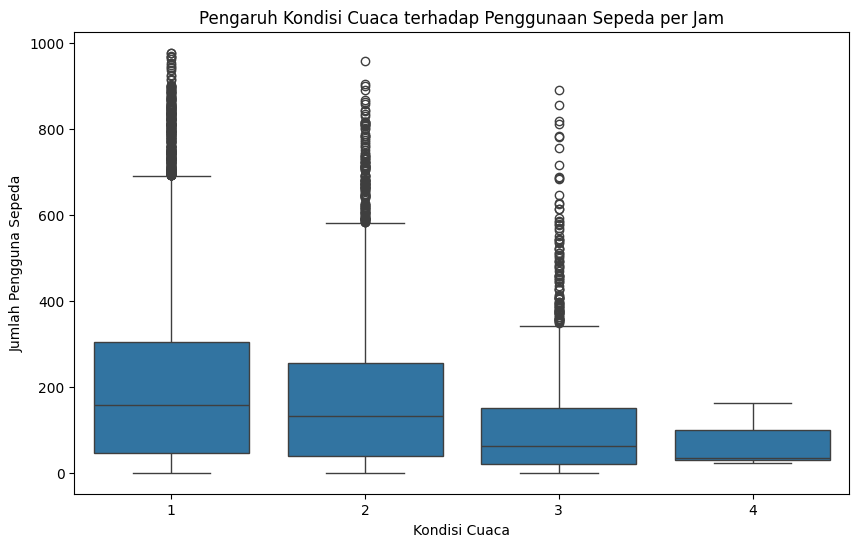

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title("Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda per Jam")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

### Pertanyaan 2: Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan di jam-jam tertentu, dan bagaimana hal ini berkaitan dengan musim?

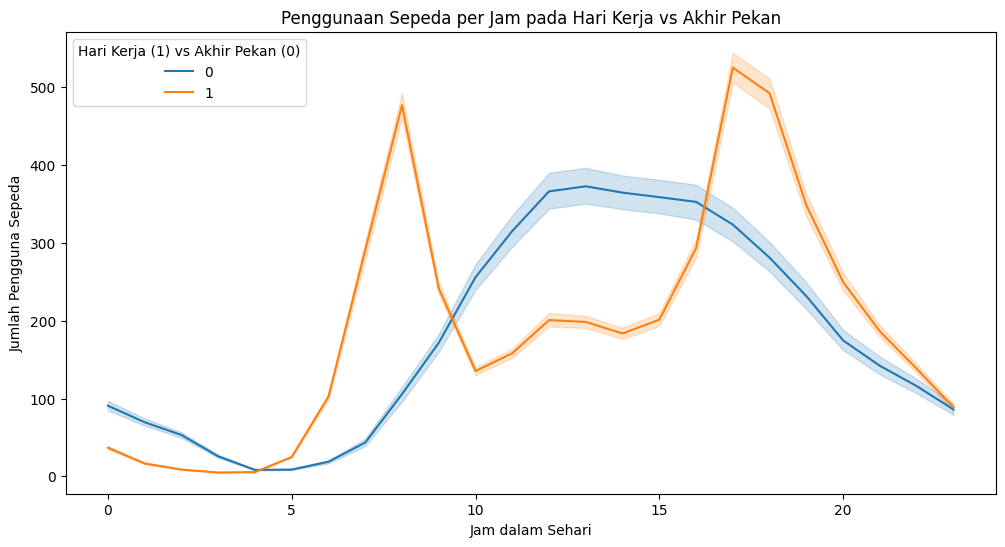

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour)
plt.title("Penggunaan Sepeda per Jam pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.legend(title="Hari Kerja (1) vs Akhir Pekan (0)")
plt.show()

**Insight:**
- Penggunaan sepeda cenderung menurun saat cuaca buruk, terutama pada jam-jam tertentu, seperti pagi dan sore hari.
- Penggunaan sepeda lebih tinggi di akhir pekan dibandingkan hari kerja, dengan pola berbeda di tiap musim yang mungkin karena kondisi cuaca atau preferensi pengguna.

## Analisis Lanjutan (Opsional)

In [23]:
daily_data_from_hour = df_hour.groupby(df_hour['dteday'].dt.date).agg({
    'cnt': 'sum',
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()
daily_data_from_hour.columns = ['dteday', 'cnt', 'temp', 'atemp', 'hum', 'windspeed']

daily_data_from_hour['dteday'] = pd.to_datetime(daily_data_from_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

comparison = pd.merge(df_day[['dteday', 'cnt']], daily_data_from_hour[['dteday', 'cnt']], on='dteday', suffixes=('_day', '_hour'))
print(comparison.head())

      dteday  cnt_day  cnt_hour
0 2011-01-01      985       985
1 2011-01-02      801       801
2 2011-01-03     1349      1349
3 2011-01-04     1562      1562
4 2011-01-05     1600      1600


**Insight:**
- Data agregasi dari **df_hour** konsisten dengan **df_day** pada kolom `cnt`, menunjukkan jumlah pengguna harian yang sama.
- Konsistensi ini menegaskan bahwa **df_day** adalah ringkasan harian yang akurat dari **df_hour**.
- **df_day** cocok untuk analisis pola harian/musiman, sedangkan **df_hour** ideal untuk analisis per jam.

## Conclusion

- **Conclusion Pertanyaan 1**: Analisis menunjukkan bahwa kondisi cuaca memiliki dampak signifikan terhadap jumlah penggunaan sepeda. Saat cuaca buruk (hujan atau kabut), jumlah pengguna sepeda menurun, terutama pada jam-jam tertentu seperti pagi dan sore hari ketika banyak orang mungkin berangkat dan pulang kerja. Ini menunjukkan bahwa layanan sepeda perlu mempertimbangkan faktor cuaca untuk perencanaan operasional dan potensi strategi promosi pada hari-hari dengan cuaca yang baik.

- **Conclusion Pertanyaan 2**: Pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan. Pada akhir pekan, penggunaan sepeda cenderung meningkat, terutama pada musim tertentu yang mendukung aktivitas luar ruangan. Di sisi lain, pada hari kerja, puncak penggunaan terjadi pada jam-jam kerja, seperti pagi dan sore. Ini menunjukkan adanya dua segmen utama pengguna: pengguna kasual yang lebih aktif di akhir pekan dan pengguna reguler yang mengandalkan sepeda untuk mobilitas harian.